<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [48]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

rng = np.random.default_rng()

# Sine wave's frequency is 1234 Hz, and
# data sampling frequency is 10e3 Hz, which is the sampling frequency of white noise
# totally 1e5 data points
# So totally 10 seconds
fs = 70
N = fs*30
# 2 Vrms sine wave
amp = 2*np.sqrt(2)
freq = 15.
# Corrupted by 0.001 V**2/Hz of white noise sampled at 10 kHz
noise_power = 0.1 * fs / 2
time = np.arange(N) / fs
# 2*pi is 1 Hz
x = amp*np.sin(2*np.pi*freq*time)
# Add white noise
x += rng.normal(scale=np.sqrt(noise_power), size=time.shape)

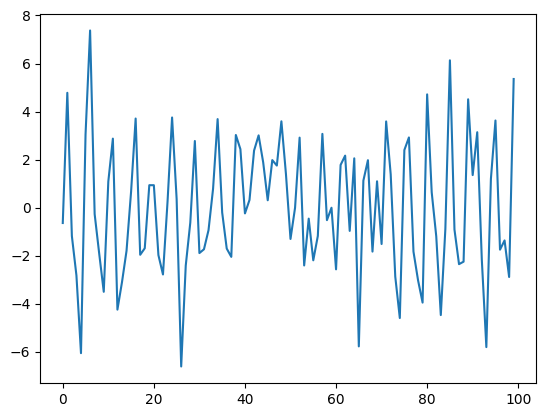

In [49]:
plt.plot(x[:100])

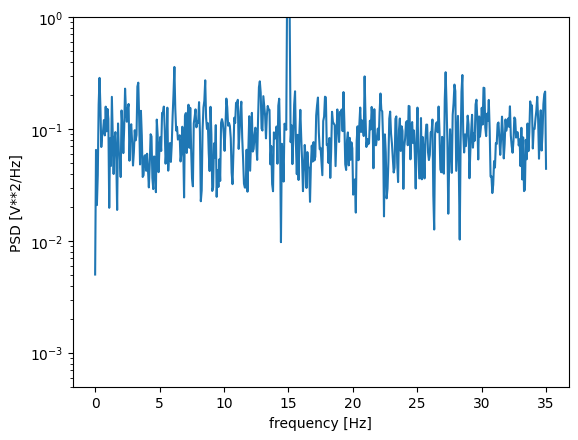

In [50]:
# Compute and plot the power spectral density
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [51]:
freq, T, Pxy = signal._spectral_py._spectral_helper(x, x, fs=fs, nperseg=256, noverlap=None)

In [35]:
_

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
       2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75,
       2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 ,
       3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85,
       3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 ,
       4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95,
       5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45, 5.5 ,
       5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  , 6.05,
       6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55, 6.6 ,
       6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 , 7.15,
       7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23628\752311466.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


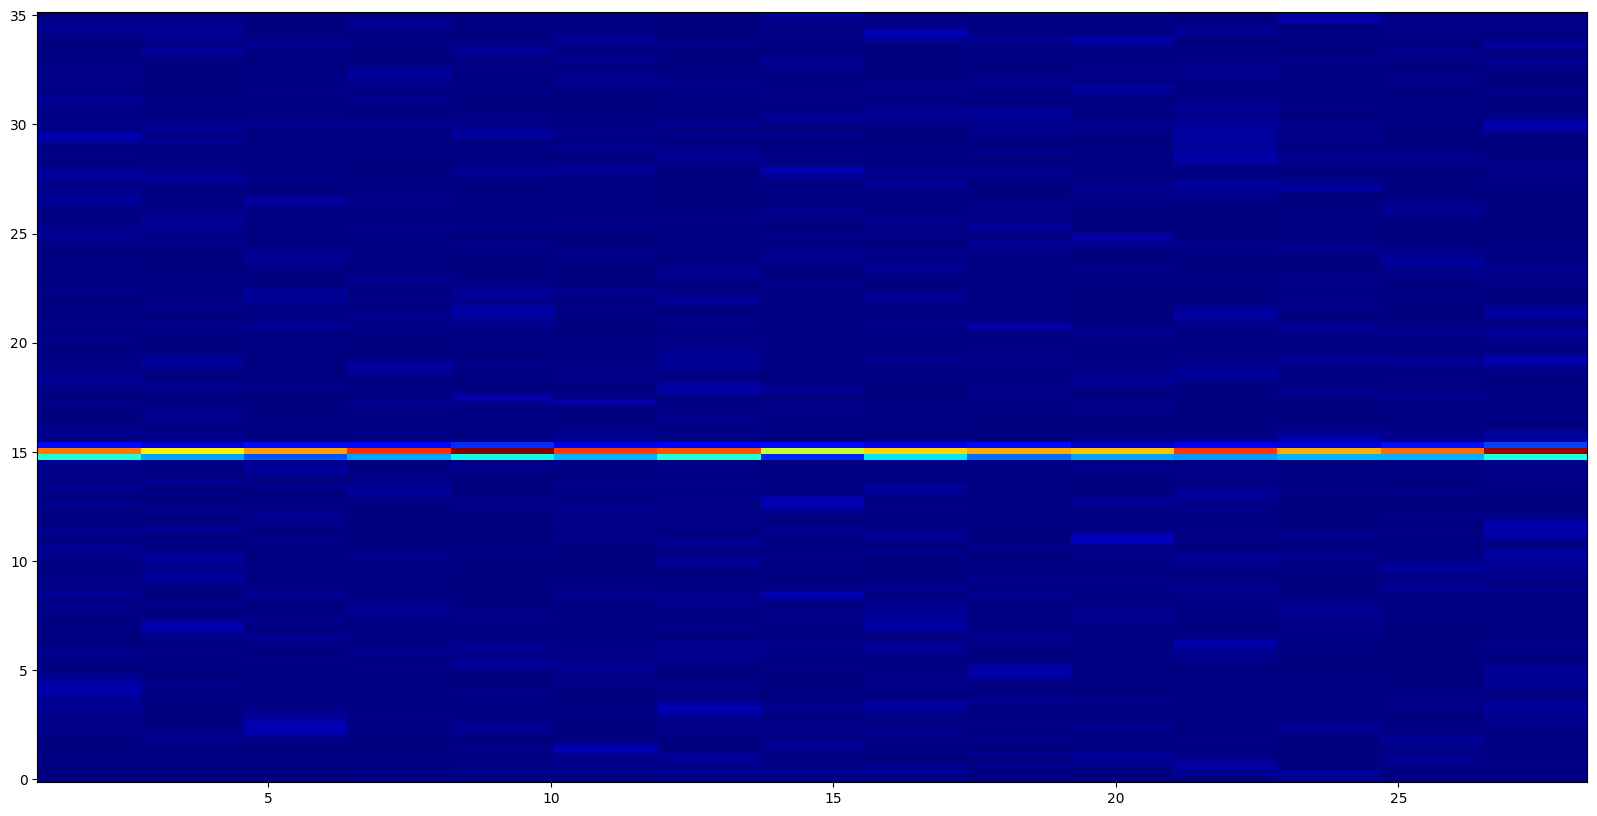

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

cmap = plt.cm.get_cmap('jet')

# ax.set_ylim(0, 30)
# cmap = plt.cm.S
ax.pcolormesh(T, freq, Pxy, cmap=cmap)
# ax.set_xticks([])